In [1]:
# import required libraries for dataframe and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from matplotlib import colors
import seaborn as sns

In [2]:
retail = pd.read_excel('dataset/digikala_customer_orders.xlsx', sheet_name="orders")

In [3]:
retail.head()

,order_id,user_id,variant_id,product_id,quantity,price,date,city_id,city_name,state_id,state_name
0,262108413,SlcW7YT835JSzh22o7zRCA==,922274,406523,1,139000,2018-08-20 23:59:02,1698,تهران,9,تهران
1,262108413,SlcW7YT835JSzh22o7zRCA==,685868,435013,1,890000,2018-08-20 23:59:02,1698,تهران,9,تهران
2,262108353,NZidrSuPdqoG7RedrFakeA==,275077,163947,1,9890000,2018-08-20 23:58:39,1698,تهران,9,تهران
3,262108341,dLQImlfXMsgSub4OcfJpGg==,679393,158560,1,349000,2018-08-20 23:58:35,1855,مشهد,12,خراسان رضوی
4,262108293,O/xo6mGsu7adcgxofe+MdQ==,769096,479854,1,320000,2018-08-20 23:58:28,1698,تهران,9,تهران


In [4]:
print(f"length of digikala dataset: {len(retail)}")

length of digikala dataset: 200000


In [5]:
retail.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   order_id    200000 non-null  int64 
 1   user_id     200000 non-null  object
 2   variant_id  200000 non-null  int64 
 3   product_id  200000 non-null  int64 
 4   quantity    200000 non-null  int64 
 5   price       200000 non-null  int64 
 6   date        200000 non-null  object
 7   city_id     200000 non-null  int64 
 8   city_name   200000 non-null  object
 9   state_id    200000 non-null  int64 
 10  state_name  200000 non-null  object
dtypes: int64(7), object(4)
memory usage: 16.8+ MB


the dataset don't have null value 

In [6]:
# Convert to datetime to proper datatype

retail['date'] = pd.to_datetime(retail['date'],format='%Y-%m-%d %H:%M:%S')

In [7]:
print(f'Minimum product price : {retail.price.min()}')
print(f'Maximum product price : {retail.price.max()}')
print(f'Avrage product price : {retail.price.mean()}')

Minimum product price : 1
Maximum product price : 212000000
Avrage product price : 1057299.821535


In [8]:
len(retail[retail.price<1000].price)

70

<AxesSubplot:>

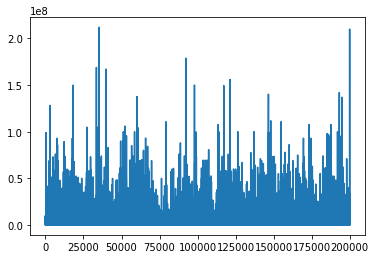

In [9]:
retail.price.plot(kind='line')

Now we will be exploring the unique values in the categorical features to get a clear idea of the data.

In [10]:
print("The total number of unique orders:",len(retail['order_id'].unique()))

The total number of unique orders: 74529


In [11]:
print("The total number of unique users:",len(retail['user_id'].unique()))

The total number of unique users: 56104


In [12]:
print("The total number of unique products:",len(retail['product_id'].unique()))

The total number of unique products: 61734


In [13]:
print("The total number of unique cities:",len(retail['city_id'].unique()))

The total number of unique cities: 829


In [14]:
print("The total number of unique states:",len(retail['state_id'].unique()))

The total number of unique states: 31


In [15]:
b=retail.groupby(['state_id','user_id','order_id']).agg({'order_id':"count"})

<AxesSubplot:>

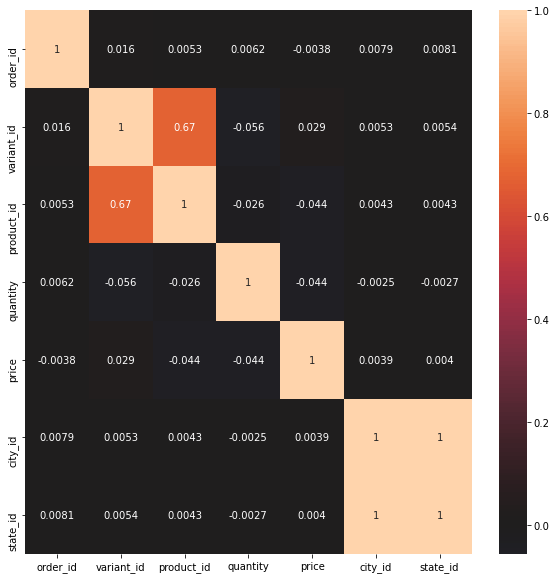

In [16]:
corrmat= retail.corr()
plt.figure(figsize=(10,10))  
sns.heatmap(corrmat,annot=True, center=0)

Text(0, 0.5, 'count')

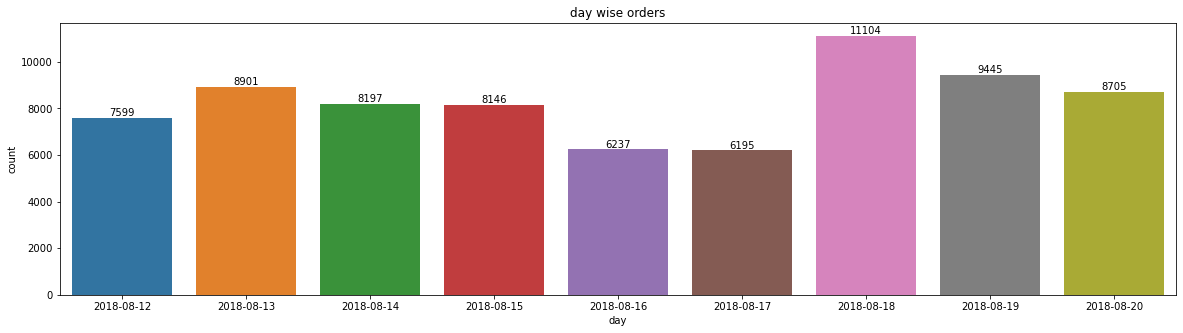

In [17]:
#data_orders_day = retail.resample('D', on='date').order_id.nunique()
retail_orders_day = retail.set_index('date').groupby(pd.Grouper(freq='D')).agg({
    'order_id':"nunique"
})

plt.figure(figsize=(20, 5))
ax=sns.barplot(x=retail_orders_day.index.date,y=retail_orders_day.order_id)
ax.bar_label(ax.containers[0])
plt.title("day wise orders")
plt.xlabel("day")
plt.ylabel("count")

Text(0, 0.5, 'count states')

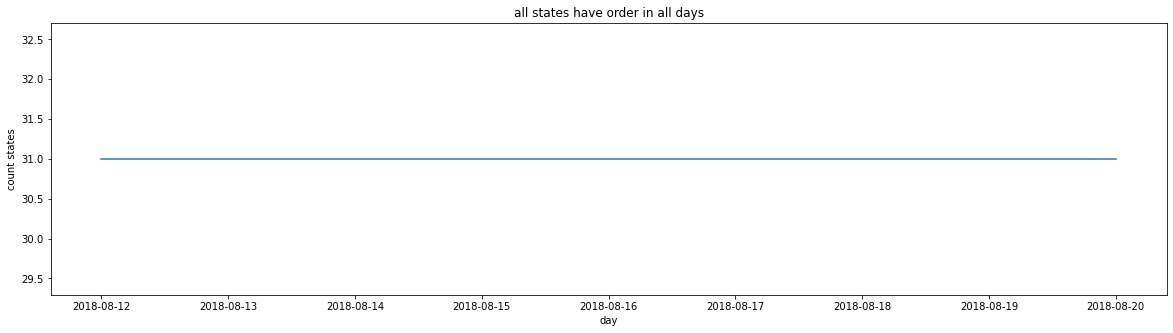

In [18]:
retail_states_day = retail.set_index('date').groupby(pd.Grouper(freq='D')).agg({
    'state_name':"nunique"
})
plt.figure(figsize=(20, 5))
ax=sns.lineplot(x=retail_states_day.index,y=retail_states_day.state_name)

plt.title("all states have order in all days")
plt.xlabel("day")
plt.ylabel("count states")

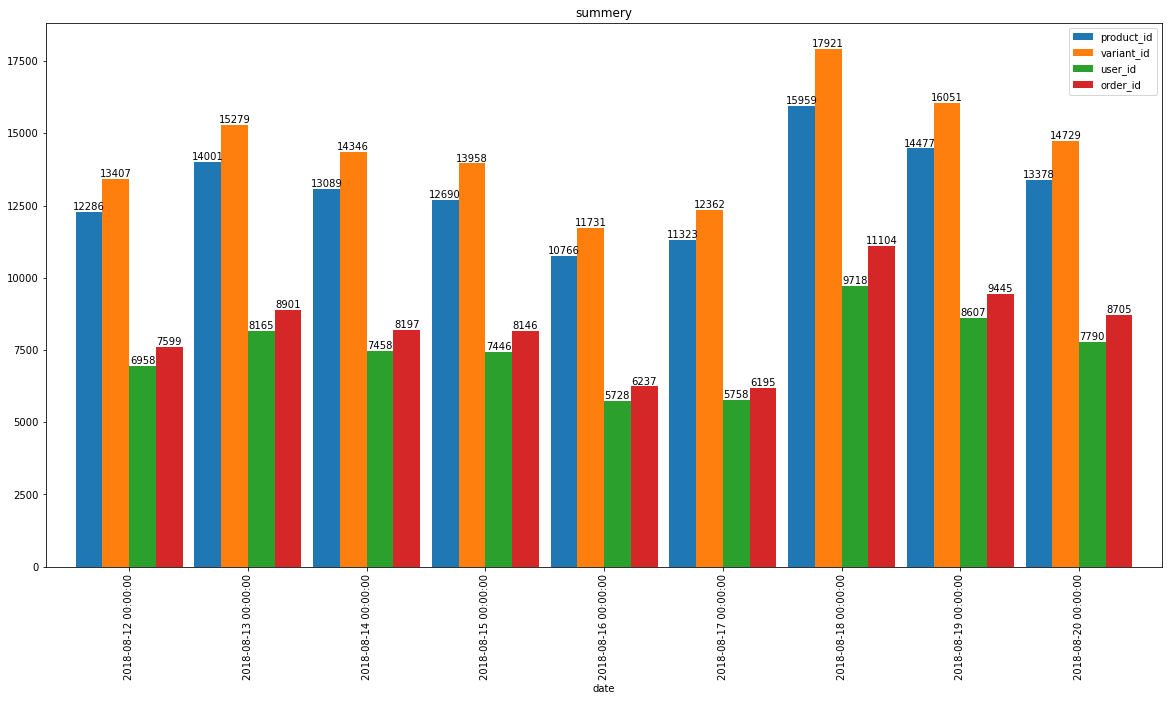

In [19]:
retail_summery_day = retail.set_index('date').groupby(pd.Grouper(freq='D')).agg({
    'product_id':"nunique",
    'variant_id':"nunique",
    'user_id':"nunique",
    'order_id':"nunique",
})

ax = retail_summery_day.plot( kind="bar",title='summery',xlabel="date",figsize=(20,10),width=0.9)
for container in ax.containers:
    ax.bar_label(container)


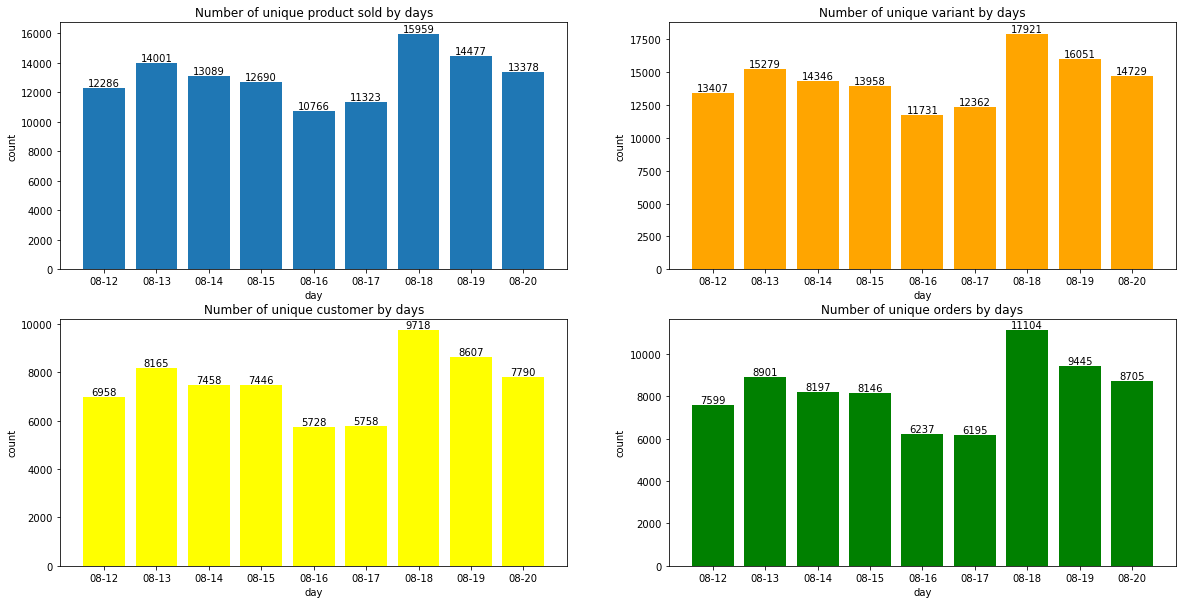

In [20]:
fig, axs = plt.subplots(2, 2,figsize=(20, 10))


axs[0, 0].bar(retail_summery_day.index.strftime('%m-%d'),retail_summery_day.product_id)
# axs[0, 0].bar_label(axs[0,0].containers[0])
axs[0, 0].set_title('Number of unique product sold by days')
axs[0, 1].bar(retail_summery_day.index.strftime('%m-%d'),retail_summery_day.variant_id,color='orange')
axs[0, 1].set_title('Number of unique variant by days')
axs[1, 0].bar(retail_summery_day.index.strftime('%m-%d'),retail_summery_day.user_id, color='yellow')
axs[1, 0].set_title('Number of unique customer by days')
axs[1, 1].bar(retail_summery_day.index.strftime('%m-%d'),retail_summery_day.order_id, color='green')
axs[1, 1].set_title('Number of unique orders by days')

for ax in axs.flat:
    ax.set(xlabel='day', ylabel='count')
    # add bar label
    for container in ax.containers:
        ax.bar_label(container)

## The most of 

In [21]:
t1=retail.groupby('user_id').agg(
    order_unique=('order_id','nunique')
)


In [22]:
t2=retail.groupby('user_id').agg(
    order_count=('order_id','count')
)


In [23]:
users_orders = pd.merge(t1,t2,on='user_id')
users_orders

,order_unique,order_count
user_id,,
++2u4Q40bTeC0ZZDau1MIQ==,1,3
++HwHhPvBHtXEIN36fDT5w==,1,6
++IfjhhQ33j7i4NHdBUJkQ==,1,1
++KPSp+1ZC6KXlYAS8VcKg==,1,15
++XCbp2ChGJyYhM/fYWudg==,1,1
...,...,...
zzWZd4QWwB0L4Un+lgk/Wg==,3,8
zzZseLwyCpzXFtpz4on05Q==,3,3
zzaH+nGpEGQI2z/KZyT1GA==,1,1


In [24]:
print(f"Minimum order users :{users_orders.order_unique.min()}")
print(f"Maximum order users :{users_orders.order_unique.max()}")
print(f"Avrage order users :{users_orders.order_unique.mean()}")

Minimum order users :1
Maximum order users :103
Avrage order users :1.3284079566519322


In [25]:
print(f"Minimum type product in order :{users_orders.order_count.min()} ")
print(f"Maximum type product in order :{users_orders.order_count.max()} ")
print(f"Avrage type product in order :{users_orders.order_count.mean()} ")

Minimum type product in order :1 
Maximum type product in order :250 
Avrage type product in order :3.5648082133181234 


In [166]:
# list(set(users_orders.order_unique))  #unique order value number

In [26]:
users_orders[users_orders.order_count == 250]


,order_unique,order_count
user_id,,
JVeVjivUAHEMQmDOXo2EXA==,36,250


In [27]:
print("Show the top 30 people : ")
users_orders.sort_values('order_unique',ascending=False).head(30)

Show the top 30 people : 


,order_unique,order_count
user_id,,
j8Sbh6vAaZBx/CodUxS/vw==,103,143
nRESEVczO8ehS5wcAC4S4A==,55,80
iBotj1LNo5cfY0r+phd3Ew==,40,124
0+ocLc2NAaQpdwJvIts0Gw==,40,108
JVeVjivUAHEMQmDOXo2EXA==,36,250
jjdnlkRVm3hgLNbCamQyUw==,36,69
acVF7HAaXBsFz6siPnPRXA==,33,90
Xnf/u43seCB45PaO7CpacQ==,33,56
9AXslhKaI5gWw7VnYVXjDg==,32,110


In [28]:
len(users_orders[users_orders.order_unique>=3])/len(users_orders)*100

6.00313703122772

In [29]:
for i in range(8):
    if i==0: continue
    if i==1:
        order_count= len(users_orders[users_orders.order_unique==i])
        result= order_count/len(users_orders)*100
    if i>=7:
        order_count= len(users_orders[users_orders.order_unique>=i])
        result= order_count/len(users_orders)*100
        print(f"percentage of users have {i} orders or more than, are: {result} and total is: {order_count}")
    else:
        order_count= len(users_orders[users_orders.order_unique>=i])
        result= order_count/len(users_orders)*100
    print(f"percentage of users have {i} orders are: {result} and total is: {order_count}")

percentage of users have 1 orders are: 100.0 and total is: 56104
percentage of users have 2 orders are: 18.850705832026236 and total is: 10576
percentage of users have 3 orders are: 6.00313703122772 and total is: 3368
percentage of users have 4 orders are: 2.673606159988593 and total is: 1500
percentage of users have 5 orders are: 1.4259232853272494 and total is: 800
percentage of users have 6 orders are: 0.8502067588763724 and total is: 477
percentage of users have 7 orders or more than, are: 0.575716526450877 and total is: 323
percentage of users have 7 orders are: 0.575716526450877 and total is: 323


<AxesSubplot:xlabel='user_id'>

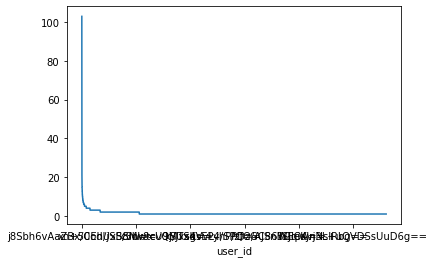

In [197]:
users_orders.sort_values('order_unique',ascending=False).order_unique.plot()

In [199]:
users_orders.order_unique.quantile([.25, .5, .75])

0.25    1.0
0.50    1.0
0.75    1.0
Name: order_unique, dtype: float64

<AxesSubplot:ylabel='Density'>

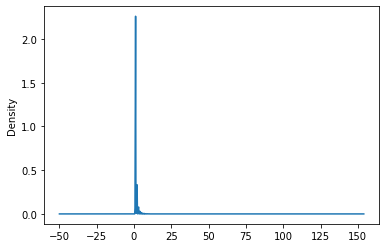

In [203]:
users_orders.order_unique.plot.kde()

,order_unique,order_count
0.25,2.0,3.0
0.50,2.0,5.0
0.75,3.0,9.0


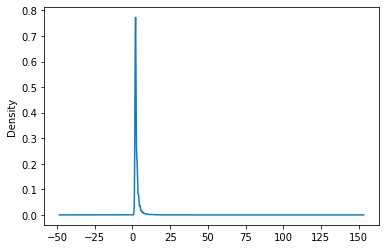

In [207]:
users_orders[users_orders.order_unique>=2].order_unique.plot.kde()
users_orders[users_orders.order_unique>=2].quantile([.25, .5, .75])

,order_unique,order_count
0.25,3.0,5.0
0.50,3.0,8.0
0.75,4.0,14.0


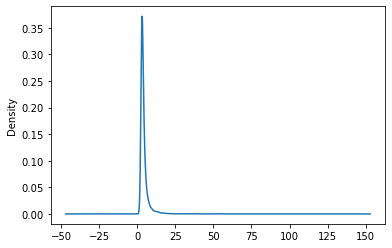

In [208]:
users_orders[users_orders.order_unique>=3].order_unique.plot.kde()
users_orders[users_orders.order_unique>=3].quantile([.25, .5, .75])

,order_unique,order_count
0.25,4.0,7.0
0.50,5.0,12.0
0.75,6.0,19.0


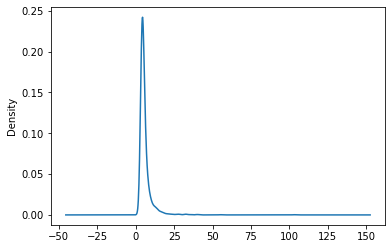

In [209]:
users_orders[users_orders.order_unique>=4].order_unique.plot.kde()
users_orders[users_orders.order_unique>=4].quantile([.25, .5, .75])

# suggestions Title

- find maximum category that have been sold
- find maximum product that have been sold
- which time the shop have max/min order
- which product or category are favratie users
- LRFMP
- time series clustering
- recommendation (which recommendations are sutable for customer convert to loyal customer)
- which time is sutable for send notification for loyal customer and what should be sent ?
- prediction price by image (use digikala api)


In [277]:
retail_product= retail.groupby('product_id').agg(user_sell_count=('user_id','count'))
print('number of unique products : ',retail.product_id.nunique()) # number of unique product
print(f'maximux count sell product is : {retail_product.max()}')
print(f'maximux count sell product is : {retail_product.min()}')
retail_product.sort_values('user_sell_count',ascending=False).head(100)



# ax = retail_product.plot( kind="bar",title='summery',xlabel="datee",figsize=(20,10),width=0.9)
# for container in ax.containers:
#     ax.bar_label(container)

number of unique products :  61734
maximux count sell product is : user_sell_count    1430
dtype: int64
maximux count sell product is : user_sell_count    1
dtype: int64


,user_sell_count
product_id,
111178,1430
458032,683
20557,611
254346,537
20558,505
...,...
570576,108
305153,108
93654,108


In [284]:
retail_variant= retail.groupby('variant_id').agg(user_sell_count=('user_id','count'))
print('number of unique products : ',retail.variant_id.nunique()) # number of unique product
print(f'maximux count sell product is : {retail_variant.max()}')
print(f'maximux count sell product is : {retail_variant.min()}')
retail_variant.sort_values('user_sell_count',ascending=False).head(100)

number of unique products :  78575
maximux count sell product is : user_sell_count    671
dtype: int64
maximux count sell product is : user_sell_count    1
dtype: int64


,user_sell_count
variant_id,
716376,671
138296,641
9537,606
118375,603
128133,436
...,...
1328920,89
43420,88
173670,88


In [289]:
date_order_detail = retail.groupby('user_id').agg(date_order=('date','nunique'))

In [306]:
t1 = retail.set_index('date').groupby([pd.Grouper(freq='D')]).nunique()

In [335]:
range_date = t1.index


In [540]:
date_df = pd.DataFrame(
retail.user_id.unique(),
columns=['user_id'])


In [541]:
%%time
day=1
for d in range_date:
    print(d)
    date_df['day_'+str(day)]=False
    temp = retail[(retail['day_date'].apply(lambda x: x==d))]
    result = pd.merge(date_df,temp[['day_date','user_id']], on="user_id")
    #print(result)
    for index,row in result.iterrows():
        #print(row['user_id'] in date_df['user_id'].values)
#         if row['user_id'] in date_df['user_id'].values:
        date_df.loc[date_df['user_id']==row['user_id'],'day_'+str(day)]=True
        
    
    day+=1


2018-08-12 00:00:00
2018-08-13 00:00:00
2018-08-14 00:00:00
2018-08-15 00:00:00
2018-08-16 00:00:00
2018-08-17 00:00:00
2018-08-18 00:00:00
2018-08-19 00:00:00
2018-08-20 00:00:00
Wall time: 26min 14s


In [549]:
date_df.to_pickle('users_date_df.pkl')

In [548]:
date_df[(date_df['day_1']==True)&(date_df['day_2']==True)&(date_df['day_3']==True)&(date_df['day_4']==True)&(date_df['day_5']==True)]


,user_id,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9
945,acVF7HAaXBsFz6siPnPRXA==,True,True,True,True,True,True,True,True,True
1930,JVeVjivUAHEMQmDOXo2EXA==,True,True,True,True,True,True,True,True,True
2116,j8Sbh6vAaZBx/CodUxS/vw==,True,True,True,True,True,False,True,True,True
4310,cPML1aygCALHfefq78wEgw==,True,True,True,True,True,False,False,True,True
5290,0+ocLc2NAaQpdwJvIts0Gw==,True,True,True,True,True,True,True,True,True
5918,mCi9evyaCWILWYVRpWTXgQ==,True,True,True,True,True,True,True,True,True
6339,chbca7XuHDG/7OJPls3fNA==,True,True,True,True,True,True,True,False,True
11225,Ccg4eL39xybhrVJkK8Y5Mw==,True,True,True,True,True,False,False,True,False
11757,lP6LFWD70d7MPLMdoGLhpA==,True,True,True,True,True,False,False,True,False
12101,51j43hNt1/aEgoHJQe+qQg==,True,True,True,True,True,True,True,True,False


In [543]:
dd =retail.set_index('date').groupby(pd.Grouper(freq='D')).agg({
    'product_id':"nunique",
    'variant_id':"nunique",
    'user_id':"nunique",
    'order_id':"nunique",
})
dd

,product_id,variant_id,user_id,order_id
date,,,,
2018-08-12,12286,13407,6958,7599
2018-08-13,14001,15279,8165,8901
2018-08-14,13089,14346,7458,8197
2018-08-15,12690,13958,7446,8146
2018-08-16,10766,11731,5728,6237
2018-08-17,11323,12362,5758,6195
2018-08-18,15959,17921,9718,11104
2018-08-19,14477,16051,8607,9445
2018-08-20,13378,14729,7790,8705


In [396]:

retail[((retail['date'] - dd.index[2]).dt.total_seconds())<86400]


,order_id,user_id,variant_id,product_id,quantity,price,date,city_id,city_name,state_id,state_name
134970,259831833,N6Ox9v23NYCx8wVnHszLUw==,1201932,657154,1,4800000,2018-08-14 23:59:49,1855,مشهد,12,خراسان رضوی
134971,259831689,jX5dG550W5io6FqpqH0Eeg==,850585,515635,1,90000,2018-08-14 23:59:16,1581,فولاد شهر,5,اصفهان
134972,259831689,jX5dG550W5io6FqpqH0Eeg==,1042812,462726,1,79000,2018-08-14 23:59:16,1581,فولاد شهر,5,اصفهان
134973,259831689,jX5dG550W5io6FqpqH0Eeg==,748439,16058,1,95000,2018-08-14 23:59:16,1581,فولاد شهر,5,اصفهان
134974,259831689,jX5dG550W5io6FqpqH0Eeg==,1313510,70258,1,100000,2018-08-14 23:59:16,1581,فولاد شهر,5,اصفهان
...,...,...,...,...,...,...,...,...,...,...,...
199995,258838077,chbca7XuHDG/7OJPls3fNA==,494706,340247,1,40000,2018-08-12 06:21:26,1698,تهران,9,تهران
199996,258838077,chbca7XuHDG/7OJPls3fNA==,823091,389988,1,325000,2018-08-12 06:21:26,1698,تهران,9,تهران
199997,258838077,chbca7XuHDG/7OJPls3fNA==,483089,334477,1,1750000,2018-08-12 06:21:26,1698,تهران,9,تهران
199998,258838077,chbca7XuHDG/7OJPls3fNA==,1129695,640539,1,184000,2018-08-12 06:21:26,1698,تهران,9,تهران


In [412]:
for idx in dd.index:
    print(f"len {idx}: {len(retail[((retail['date'].date() -idx.date()).dt.days)==1])}")

AttributeError: 'Series' object has no attribute 'date'

In [418]:
retail['day_date']= retail['date'].apply(lambda x: x.date())

In [419]:
retail['day_date']

0         2018-08-20
1         2018-08-20
2         2018-08-20
3         2018-08-20
4         2018-08-20
             ...    
199995    2018-08-12
199996    2018-08-12
199997    2018-08-12
199998    2018-08-12
199999    2018-08-12
Name: day_date, Length: 200000, dtype: object